# Problem Statement

IMDb Movie Award membuat segmen acara khusus untuk memberi penghargaan perfilman

Gunakan data pada database yang tertera pada link di bawah ini.

https://relational.fit.cvut.cz/dataset/IMDb

# Install Dependencies

In [ ]:
!pip3 install mysql-connector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 43.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp39-cp39-linux_x86_64.whl size=247964 sha256=3753acbc9fa97b70b1f839069b8f72c9d45360686b9f4be37b7696dc417e0011
  Stored in directory: /root/.cache/pip/wheels/7b/14/39/5aad423666e827dfe9a1fbcd111ac17171e7c9865d570780ce
Successfully built mysql-connector


# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Predefined Function

In [ ]:
def que(query, engine):
    df = pd.read_sql(query, engine)
    return df

# Data Collection

Dari problem statement di atas, saya menyimpulkan bahwa saya membutuhkan

*   Data Aktor dan Aktris (actors)
*   Data Movies di mana aktor dan aktris tersebut berperan (roles, movies)
*   Metode untuk menghitung rating dari aktor dan aktris berdasarkan rating sebuah film, dimana kita berasumsi bahwa aktor dan aktris memiliki peran dalam memberikan rating yang bagus kepada sebuah film


In [ ]:
username = 'guest'
password = 'relational'
host = 'relational.fit.cvut.cz'
database = 'imdb_ijs'

engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}/{database}")


In [ ]:
# check tables
query='''
    show tables
'''

que(query, engine)

,Tables_in_imdb_ijs
0,actors
1,directors
2,directors_genres
3,movies
4,movies_directors
5,movies_genres
6,roles


In [ ]:
# print first 5 rows of each tables
query='''
    show tables
'''

tables = que(query, engine)

for i in tables.Tables_in_imdb_ijs:
  query='''
      select * from ''' + i + '''
      limit 5
      
  '''

  print('TABLE:', i)
  print(que(query, engine))
  print()

TABLE: actors
   id first_name           last_name gender
0   2    Michael  'babeepower' Viera      M
1   3       Eloy         'Chincheta'      M
2   4   Dieguito         'El Cigala'      M
3   5    Antonio    'El de Chipiona'      M
4   6       José        'El Francés'      M

TABLE: directors
   id first_name    last_name
0   1       Todd            1
1   2        Les  12 Poissons
2   3    Lejaren     a'Hiller
3   4       Nian            A
4   5   Khairiya    A-Mansour

TABLE: directors_genres
   director_id        genre  prob
0            2        Short   1.0
1            3        Drama   1.0
2            5  Documentary   1.0
3            6        Drama   1.0
4            6        Short   1.0

TABLE: movies
   id                                 name  year  rank
0   0                                  #28  2002   NaN
1   1  #7 Train: An Immigrant Journey, The  2000   NaN
2   2                                    $  1971   6.4
3   3                        $1,000 Reward  1913   NaN
4   4

Dari output di atas, kemungkinan tabel yang digunakan untuk Soal Nomor 1 adalah


*   actors
*   roles
*   movies




# Nomor 1
IMDb Movie Award membuat segmen acara khusus untuk memberi penghargaan perfilman pada tahun 1990-1999. Tim produksi membutuhkan daftar 5 nominasi dan 1 pemenang untuk masing-masing kategori penghargaan utama, yaitu Aktor Terbaik Tahun 90an dan Aktris Terbaik Tahun 90an.

## Data Cleaning

In [ ]:
# query untuk mengambil data AKTRIS yang akan dianalisis dengan syarat rating tidak boleh Null
query='''
    select concat(a.first_name," ",a.last_name) as name, a.gender as gender, m.name as movie, m.year as year, m.rank as rating
    from actors a
      left join roles r on a.id = r.actor_id
      left join movies m on r.movie_id = m.id
    where gender <> 'M'
    and year between 1990 and 1999
    and m.rank is not null
'''

df_actress = que(query, engine)
df_actress

,name,gender,movie,year,rating
0,Sara (I) Gilbert,F,$30,1999,7.5
1,Veva K. Bissonnette,F,"$40,000",1996,9.6
2,Carol Bjorkman,F,"$40,000",1996,9.6
3,Cynthia Boyd,F,"$40,000",1996,9.6
4,Nancy O. Crampton,F,"$40,000",1996,9.6
...,...,...,...,...,...
107441,Hilda van der Meulen,F,". 19,99",1998,6.3
107442,Ine van Donk,F,". 19,99",1998,6.3
107443,Ineke Veenhoven,F,". 19,99",1998,6.3
107444,Lies Visschedijk,F,". 19,99",1998,6.3


In [ ]:
# query untuk mengambil data AKTOR yang akan dianalisis dengan syarat rating tidak boleh Null
query='''
    select concat(a.first_name," ",a.last_name) as name, a.gender as gender, m.name as movie, m.year as year, m.rank as rating
    from actors a
      left join roles r on a.id = r.actor_id
      left join movies m on r.movie_id = m.id
    where gender = 'M'
    and year between 1990 and 1999
    and m.rank is not null
'''

df_actor = que(query, engine)
df_actor

,name,gender,movie,year,rating
0,Gregory Itzin,M,$30,1999,7.5
1,Erik MacArthur,M,$30,1999,7.5
2,Michael Agbabian,M,"$40,000",1996,9.6
3,Ron Bagel,M,"$40,000",1996,9.6
4,Jason Baskin,M,"$40,000",1996,9.6
...,...,...,...,...,...
220926,Gerard van Wijk,M,". 19,99",1998,6.3
220927,Wil Wassenaar,M,". 19,99",1998,6.3
220928,Jeroen Willems,M,". 19,99",1998,6.3
220929,Willem de Wolf,M,". 19,99",1998,6.3


### Check Null Values

Dengan syntax sebelumnya, maka sudah didapatkan data-data yang tidak memiliki NULL pada kolom yang dibutuhkan. Untuk memastikan, kita dapat melakukan pengecekan

In [ ]:
df_actor.isnull().any()

name      False
gender    False
movie     False
year      False
rating    False
dtype: bool

In [ ]:
df_actress.isnull().any()

name      False
gender    False
movie     False
year      False
rating    False
dtype: bool

### Check Irregular Values

In [ ]:
# check data type
df_actor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220931 entries, 0 to 220930
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    220931 non-null  object 
 1   gender  220931 non-null  object 
 2   movie   220931 non-null  object 
 3   year    220931 non-null  int64  
 4   rating  220931 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.4+ MB


In [ ]:
# check data type
df_actress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107446 entries, 0 to 107445
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    107446 non-null  object 
 1   gender  107446 non-null  object 
 2   movie   107446 non-null  object 
 3   year    107446 non-null  int64  
 4   rating  107446 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.1+ MB


Data yang diperlukan untuk diolah secara matematis hanya rating, untuk itu kolom 'year' perlu diubah tipe data menjadi string.

In [ ]:
# data type adjustment
df_actor['year'] = df_actor['year'].astype(str)
df_actress['year'] = df_actress['year'].astype(str)
print(df_actor.info())
print(df_actress.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220931 entries, 0 to 220930
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    220931 non-null  object 
 1   gender  220931 non-null  object 
 2   movie   220931 non-null  object 
 3   year    220931 non-null  object 
 4   rating  220931 non-null  float64
dtypes: float64(1), object(4)
memory usage: 8.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107446 entries, 0 to 107445
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    107446 non-null  object 
 1   gender  107446 non-null  object 
 2   movie   107446 non-null  object 
 3   year    107446 non-null  object 
 4   rating  107446 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.1+ MB
None


In [ ]:
# check year values, the values supposed to be >= 1990 and <= 1999 only
year_a = sorted(df_actor['year'].unique())
year_b = sorted(df_actress['year'].unique())

print(year_a)
print(year_b)

['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999']
['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999']


<AxesSubplot:>

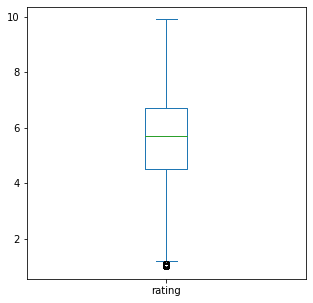

In [ ]:
# check outlier in movie_rating
df_actor['rating'].plot.box(figsize=(5,5))

<AxesSubplot:>

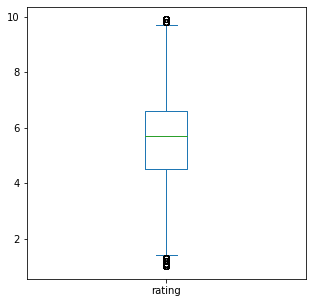

In [ ]:
df_actress['rating'].plot.box(figsize=(5,5))

Ditemukan beberapa data outlier pada `rating` untuk kategori Aktor dan Aktris. Namun tidak perlu dilakukan outlier handling karena nilai outlier masih dalam range yang wajar pada konteks rating yang pada umumnya adalah 0-10.

In [ ]:
desc_actor = df_actor['rating'].describe()
desc_actress = df_actress['rating'].describe()

print(desc_actor)
print(desc_actress)

count    220931.000000
mean          5.549550
std           1.525602
min           1.000000
25%           4.500000
50%           5.700000
75%           6.700000
max           9.900000
Name: rating, dtype: float64
count    107446.000000
mean          5.540234
std           1.512713
min           1.000000
25%           4.500000
50%           5.700000
75%           6.600000
max           9.900000
Name: rating, dtype: float64


### Check Duplicate Values

In [ ]:
df_actor[df_actor.duplicated(keep=False)]

,name,gender,movie,year,rating
1444,Timothy J.,M,3000 scnarios contre un virus,1994,4.2
1445,Timothy J.,M,3000 scnarios contre un virus,1994,4.2
19501,Genesis P-Orridge,M,Better Living Through Circuitry,1999,6.8
19502,Genesis P-Orridge,M,Better Living Through Circuitry,1999,6.8
36489,Bali Brahmabhatt,M,Choodalani Vundi,1998,7.5
36490,Bali Brahmabhatt,M,Choodalani Vundi,1998,7.5


Terdapat 3 data duplikat, dimana nama aktor, judul film, tahun, dan rating sama. Untuk itu, perlu dilakukan tindakan untuk menghilangkan data duplikat

In [ ]:
df_actor[df_actor.duplicated(subset=['name','rating'],keep='first')]

,name,gender,movie,year,rating
1445,Timothy J.,M,3000 scnarios contre un virus,1994,4.2
2496,Laxmikant Berde,M,Aarzoo,1999,5.9
2675,Victor Löw,M,Abeltje (1998/I),1998,5.6
2676,Julian Nest,M,Abeltje (1998/I),1998,5.6
2715,Wendell Pierce,M,Abilene,1999,5.6
...,...,...,...,...,...
220800,Rasmus Haxen,M,rnens je,1997,6.6
220806,Lars Lohmann,M,rnens je,1997,6.6
220815,Peter Rygaard,M,rnens je,1997,6.6
220878,Riley Cantner,M,"ltimo Mergulho, O",1992,6.4


In [ ]:
df_actress[df_actress.duplicated(keep=False)]

,name,gender,movie,year,rating
38928,Rosemarie Quednau,F,Grey Owl,1999,5.7
38929,Rosemarie Quednau,F,Grey Owl,1999,5.7


In [ ]:
df_actress[df_actress.duplicated(subset=['name','rating'],keep='first')]

,name,gender,movie,year,rating
1228,Madhuri Dixit,F,Aarzoo,1999,5.9
1349,Claire (II) Johnston,F,Abeltje (1998/I),1998,5.6
1350,Radica Jovicic,F,Abeltje (1998/I),1998,5.6
1766,Judith (I) Henry,F,Adeus Princesa,1994,6.9
2245,Anjelica Huston,F,Agnes Browne,1999,6.1
...,...,...,...,...,...
107284,Isabelle Huppert,F,"cole de la chair, L'",1998,7.1
107323,Dominique Marcas,F,lisa,1995,6.7
107385,Camilla Lundén,F,gat,1998,5.9
107419,Teresa Roby,F,"ltimo Mergulho, O",1992,6.4


In [ ]:
print('unique actor name:', len(df_actor['name'].unique()))
print('unique actor movie title:', len(df_actor['movie'].unique()))
print('unique actress name:', len(df_actress['name'].unique()))
print('unique actress movie title:', len(df_actress['movie'].unique()))

unique actor name: 116231
unique actor movie title: 14974
unique actress name: 62871
unique actress movie title: 14269


Jumlah aktor/aktris yang lebih banyak daripada jumlah movie bukan merupakan sebuah anomali, dimana sewajarnya sebuah movie memiliki lebih dari 1 aktor.

Permasalahan yang perlu diperhatikan adalah pada kategori Aktor, terdapat 14.974 judul film, namun pada kategori Aktris, hanya terdapat 14.269 judul film. Dapat diasumsikan bahwa ada data yang hilang pada saat kita menghilangkan baris dengan data NULL pada langkah awal

Kemudian, kita akan mengeliminasi aktor dan aktris yang hanya memainkan 1 film saja. Sehingga, untuk masuk ke dalam perhitungan nominasi, setiap aktor dan aktris harus berperan dalam minimal 2 film

In [ ]:
df_actress_eligible = df_actress.groupby('name')['rating'].mean()
df_actress_eligible_flt = df_actress_eligible[df_actress_eligible.index.isin(df_actress['name'][df_actress['name'].duplicated()])]
df_actress_eligible_flt = df_actress_eligible_flt.reset_index()
df_actress_eligible_flt = df_actress_eligible_flt.loc[:, ['name', 'rating']]
print(df_actress_eligible_flt)

                          name    rating
0              A. Hans Scheirl  5.450000
1             A.J. (I) Johnson  4.383333
2                    A.J. Cook  4.833333
3                  A.J. Langer  4.550000
4              Aase (I) Hansen  6.350000
...                        ...       ...
16146              Éva Kerekes  6.200000
16147                 Éva Vári  6.166667
16148  Ólafía Hrönn Jónsdóttir  6.000000
16149               Özay Fecht  5.250000
16150            Ülle Kaljuste  5.466667

[16151 rows x 2 columns]


In [ ]:
df_actor_eligible = df_actor.groupby('name')['rating'].mean()
df_actor_eligible_flt = df_actor_eligible[df_actor_eligible.index.isin(df_actor['name'][df_actor['name'].duplicated()])]
df_actor_eligible_flt = df_actor_eligible_flt.reset_index()
df_actor_eligible_flt = df_actor_eligible_flt.loc[:, ['name', 'rating']]
print(df_actor_eligible_flt)

                             name    rating
0         'Hurricane Ryu' Hariken  5.825000
1      'Stuttering' John Melendez  5.433333
2             'Weird Al' Yankovic  5.640000
3                'Wild' Bill Mock  3.675000
4                      A Martinez  5.350000
...                           ...       ...
32650               Örjan Ramberg  3.760000
32651         Örvar Jens Arnarson  6.500000
32652            Øystein Selenius  5.850000
32653           Øyvin Bang Berven  3.700000
32654        Þröstur Guðbjartsson  7.650000

[32655 rows x 2 columns]


Setelah dilakukan filtering, maka terdapat 32.655 Aktor dan 16.151 Aktris yang berhak menjadi nominee penghargaan

## Data Analysis

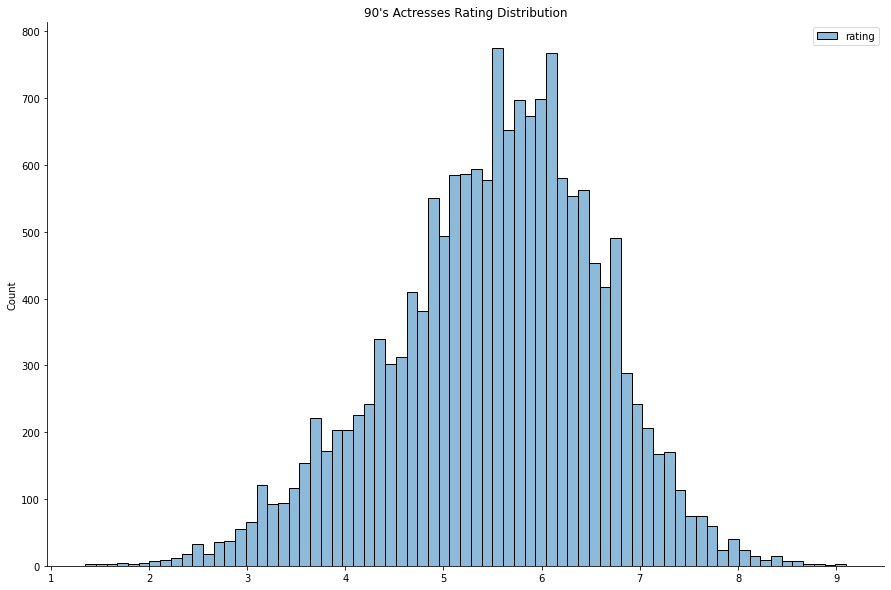

In [ ]:
plt.figure(figsize=(15,10))
plt.title('90\'s Actresses Rating Distribution')
sns.histplot(df_actress_eligible_flt)
sns.despine()
plt.show()

Distribusi rating film yang dibintangi oleh para Aktris banyak terpusat antara rating 5-7 dan sangat sedikit pada nilai rating 8 ke atas dan 2 ke bawah. Hal ini dapat menunjang asumsi analisis dalam menggunakan rating film sebagai variabel penilaian karena jumlah film dengan nilai rating tinggi sedikit.

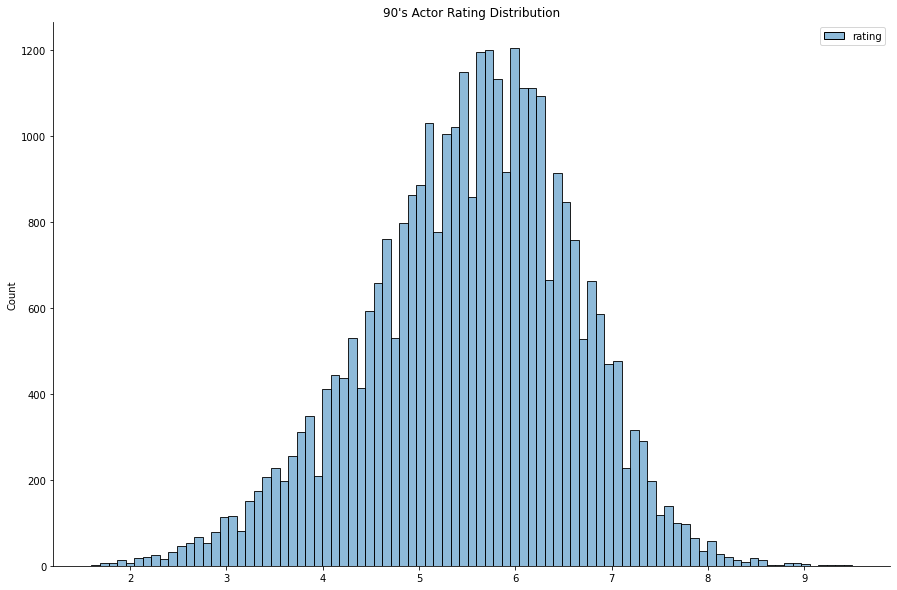

In [ ]:
plt.figure(figsize=(15,10))
plt.title('90\'s Actor Rating Distribution')
sns.histplot(df_actor_eligible_flt)
sns.despine()
plt.show()

Distribusi rating film yang dibintangi oleh para Aktor banyak terpusat antara rating 4-7 dan sangat sedikit pada nilai rating 8 ke atas dan 2 ke bawah. Hal ini dapat menunjang asumsi analisis dalam menggunakan rating film sebagai variabel penilaian karena jumlah film dengan nilai rating tinggi sedikit.

Berdasarkan proses yang telah dilakukan, dimana setiap tabel Aktor dan Aktris telah dihitung rata-rata rating mereka dengan syarat minimal telah membintangi 2 buah film dan dengan telah dilakukan visualisasi persebaran rating para Aktor dan Aktris, maka dapat dilakukan pengurutan 5 Aktor dan Aktris terbaik sebagai berikut

## Conclusions

Maka berdasarkan rata-rata rating film yang dari awal telah kita asumsikan akan digunakan dalam menghitung rating Aktor dan Aktris, maka didapatkan daftar nominasi dan pemenang sebagai berikut.

In [ ]:
nominee_actor = df_actor_eligible_flt.sort_values(by='rating', ascending=False).head(5)
winner_actor = nominee_actor.iloc[0]

print('Nominasi Aktor Terbaik Tahun 90an:\n', nominee_actor)

print()
print('Aktor Terbaik Adalah : \n', winner_actor)

Nominasi Aktor Terbaik Tahun 90an:
                     name  rating
22033    Mustafa Qureshi    9.50
24382        Philip Bury    9.40
28551      Spence Decker    9.30
15363  John (VI) Gilbert    9.15
28205   Shaughn Buchholz    9.05

Aktor Terbaik Adalah : 
 name      Mustafa Qureshi
rating                9.5
Name: 22033, dtype: object


In [ ]:
nominee_actress = df_actress_eligible_flt.sort_values(by='rating', ascending=False).head(5)
winner_actress = nominee_actress.iloc[0]

print('Nominasi Aktris Terbaik Tahun 90an:\n', nominee_actress)

print()
print('Aktris Terbaik Adalah : \n', winner_actress)

Nominasi Aktris Terbaik Tahun 90an:
                      name  rating
14377    Stephanie Pinola    9.10
388    Allison (II) Moore    9.00
12845     Rajshree Sawant    9.00
15984         Yuki Minowa    8.90
7366         Julia Lindig    8.85

Aktris Terbaik Adalah : 
 name      Stephanie Pinola
rating                 9.1
Name: 14377, dtype: object


Dilakukan analisa lanjutan, dimana pemenang dari kategori Aktor Terbaik, Mustafa Qureshi.

Dalam hal ini, kita akan melihat jumlah film yang dibintangi beserta berapa rating dari masing-masing film

In [ ]:
query='''
    select *
    from actors a
    left join roles r on a.id = r.actor_id
    left join movies m on r.movie_id = m.id
    where a.first_name = 'Mustafa'
    and a.last_name = 'Qureshi'
    and m.year between 1990 and 1999
'''

df_testing_male = que(query, engine)
df_testing_male

,id,first_name,last_name,gender,actor_id,movie_id,role,id,name,year,rank
0,386792,Mustafa,Qureshi,M,386792,58450,,58450,Chahat,1992,NaN
1,386792,Mustafa,Qureshi,M,386792,61383,,61383,Chief Sahib,1996,NaN
2,386792,Mustafa,Qureshi,M,386792,130121,,130121,Godfather,1992,9.1
3,386792,Mustafa,Qureshi,M,386792,160928,,160928,International Gorillay,1990,NaN
4,386792,Mustafa,Qureshi,M,386792,166487,,166487,Jeeva,1995,NaN
5,386792,Mustafa,Qureshi,M,386792,193418,,193418,Loha,1990,NaN
6,386792,Mustafa,Qureshi,M,386792,222307,,222307,Mummy,1996,NaN
7,386792,Mustafa,Qureshi,M,386792,226608,,226608,Nag Devta,1991,NaN
8,386792,Mustafa,Qureshi,M,386792,288249,,288249,Sargam,1995,9.9
9,386792,Mustafa,Qureshi,M,386792,296720,,296720,Shadmani,1990,NaN


In [ ]:
query='''
    select *
    from actors a
    left join roles r on a.id = r.actor_id
    left join movies m on r.movie_id = m.id
    where a.first_name = 'Philip'
    and a.last_name = 'Bury'
    and m.year between 1990 and 1999
'''

df_testing_male = que(query, engine)
df_testing_male

,id,first_name,last_name,gender,actor_id,movie_id,role,id,name,year,rank
0,65476,Philip,Bury,M,65476,175739,Bar tender,175739,"Ketchup and Mustard Man, The",1994,9.8
1,65476,Philip,Bury,M,65476,203359,Buck Naked,203359,"Man on the Moon, The",1993,9.0


Dari hasil analisa lebih lanjut, maka ditemukan bahwa Mustafa Qureshi bermain untuk 9 film dalam rentang waktu 1990 - 1999, namun ditemukan juga data bahwa beliau hanya memiliki rating pada 2 film saja.

Mempertimbangkan rating pada kedua film, masing-masing 9.1 dan 9.9, serta asumsi bahwa jika Mustafa Qureshi memiliki kualitas yang tidak baik maka dia tidak akan membintangi hingga 9 film dalam 10 tahun, maka penghargaan Aktor terbaik sepantasnya akan diberikan kepada Mustafa Qureshi.

Meski begitu, dilakukan analisa terhadap peringkat 2, yaitu Philip Bury. Namun pada data yang ditampilkan, Philip Bury hanya bermain pada 2 film dan mendapatkan rata-rata rating 9.4. Berdasarkan hasil yang kita dapatkan, maka Mustafa Qureshi kita nobatkan sebagai Aktor Terbaik

Selanjutnya hal yang sama akan kita lakukan kepada pemenang dari kategori Aktris terbaik

In [ ]:
query='''
    select *
    from actors a
    left join roles r on a.id = r.actor_id
    left join movies m on r.movie_id = m.id
    where a.first_name = 'Stephanie'
    and a.last_name = 'Pinola'
    and m.year between 1990 and 1999
'''

df_testing_female = que(query, engine)
df_testing_female

,id,first_name,last_name,gender,actor_id,movie_id,role,id,name,year,rank
0,755070,Stephanie,Pinola,F,755070,198835,Kate (special edition),198835,Macabre Pair of Shorts,1996,9.4
1,755070,Stephanie,Pinola,F,755070,331338,Herself,331338,Three Days (1999/I),1999,8.8


In [ ]:
query='''
    select *
    from actors a
    left join roles r on a.id = r.actor_id
    left join movies m on r.movie_id = m.id
    where a.first_name = 'Allison (II)'
    and a.last_name = 'Moore'
    and m.year between 1990 and 1999
'''

df_testing_female2 = que(query, engine)
df_testing_female2

,id,first_name,last_name,gender,actor_id,movie_id,role,id,name,year,rank
0,727115,Allison (II),Moore,F,727115,37331,DeeDee,37331,"Big Sister, The",1995,9.3
1,727115,Allison (II),Moore,F,727115,85248,Dee Dee,85248,Dexter's Laboratory,1995,8.7
2,727115,Allison (II),Moore,F,727115,386242,Dee Dee (#1) (rotating role),386242,"""Dexter's Laboratory""",1996,NaN


In [ ]:
query='''
    select *
    from actors a
    left join roles r on a.id = r.actor_id
    left join movies m on r.movie_id = m.id
    where a.first_name = 'Rajshree'
    and a.last_name = 'Sawant'
    and m.year between 1990 and 1999
'''

df_testing_female3 = que(query, engine)
df_testing_female3

,id,first_name,last_name,gender,actor_id,movie_id,role,id,name,year,rank
0,782473,Rajshree,Sawant,F,782473,86621,,86621,Diksha,1991,8.7
1,782473,Rajshree,Sawant,F,782473,87701,Phulvanti,87701,Disha,1990,9.3


Pada kategori Aktris Terbaik, pada Stephanie Pinola ternyata dia hanya bermain dalam 2 film, yang meskipun memenuhi kriteria, namun belum memberikan kesan kuat apakah dia konsisten, ditambah pertama kali Stephanie Pinola bermain peran adalah pada tahun 1996 dan memainkan film keduanya pada 1999

Untuk itu, dilakukan analisa lebih lanjut terhadap data untuk Aktris pada posisi kedua, yaitu Allison (II) Moore. Pada data terlihat bahwa Alisson (II) Moore bermain pada 3 film, di mana salah satunya tidak mendapat rating (null value). Rata-rata kedua film Allison serta rating pada masing-masing film masih lebih rendah daripada Stephanie Pinola serta kedua film dirilis pada tahun yang sama, namun setelahnya Allison (II) Moore tidak bermain peran lagi

Karena rating peringkat ketiga, yaitu Rajshree Sawant sama dengan Allison (II) Moore, maka dilakukan analisa juga pada data Rajshree, dimana ditemukan hasilnya adalah Rajshree bermain pada 2 film di tahun 1990 dan 1991, kemudian dia tidak bermain peran lagi. Kedua filmnya mendapatkan rating rata-rata dan rating per film di bawah Stephanie Pinola.

Atas dasar ini, maka kita dapat memutuskan Stephanie Pinola sebagai Aktris Terbaik

In [ ]:
#Pengecekan Aktor dan Aktris terbaik dapat juga dilakukan dengan menggunakan SQL Query berdasarkan kualifikasi yang telah kita tentukan sebelumnya
#Mencari Aktor Terbaik
query = '''
        SELECT concat(a.first_name," ",a.last_name) as actorname, AVG(m.rank) AS rating, COUNT(DISTINCT m.id) as number_of_movie
FROM actors a
LEFT JOIN roles r ON a.id = r.actor_id
LEFT JOIN movies m ON r.movie_id = m.id
WHERE a.gender = 'M'
AND m.year BETWEEN 1990 AND 1999
AND m.rank IS NOT NULL
GROUP BY concat(a.first_name," ",a.last_name)
HAVING number_of_movie >= 2
ORDER BY rating DESC
        '''

dfa = que(query, engine).head()
print('Nominasi Aktor Terbaik : ')
print(dfa)
print(" ")

query2 = '''
        SELECT concat(a.first_name," ",a.last_name) as actorname, AVG(m.rank) AS rating, COUNT(DISTINCT m.id) as number_of_movie
FROM actors a
LEFT JOIN roles r ON a.id = r.actor_id
LEFT JOIN movies m ON r.movie_id = m.id
WHERE a.gender != 'M'
AND m.year BETWEEN 1990 AND 1999
AND m.rank IS NOT NULL
GROUP BY concat(a.first_name," ",a.last_name)
HAVING number_of_movie >= 2
ORDER BY rating DESC
        '''
print('Nominasi Aktris Terbaik : ')
dfb = que(query2, engine).head()
print(dfb)

Nominasi Aktor Terbaik : 
           actorname  rating  number_of_movie
0    Mustafa Qureshi    9.50                2
1        Philip Bury    9.40                2
2      Spence Decker    9.30                2
3  John (VI) Gilbert    9.15                2
4   Shaughn Buchholz    9.05                2
 
Nominasi Aktris Terbaik : 
            actorname  rating  number_of_movie
0    Stephanie Pinola    9.10                2
1  Allison (II) Moore    9.00                2
2     Rajshree Sawant    9.00                2
3         Yuki Minowa    8.90                2
4      Lucélia Santos    8.85                2


##RESULT


In [ ]:
nominee_actor = df_actor_eligible_flt.sort_values(by='rating', ascending=False).head(5)
winner_actor = nominee_actor.iloc[0]

print('Nominasi Aktor Terbaik Tahun 90an:\n', nominee_actor)

print()
print('Aktor Terbaik Adalah : \n', winner_actor)
print("")
print("-------------------------")
print("")
nominee_actress = df_actress_eligible_flt.sort_values(by='rating', ascending=False).head(5)
winner_actress = nominee_actress.iloc[0]

print('Nominasi Aktris Terbaik Tahun 90an:\n', nominee_actress)

print()
print('Aktris Terbaik Adalah : \n', winner_actress)

Nominasi Aktor Terbaik Tahun 90an:
                     name  rating
22033    Mustafa Qureshi    9.50
24382        Philip Bury    9.40
28551      Spence Decker    9.30
15363  John (VI) Gilbert    9.15
28205   Shaughn Buchholz    9.05

Aktor Terbaik Adalah : 
 name      Mustafa Qureshi
rating                9.5
Name: 22033, dtype: object

-------------------------

Nominasi Aktris Terbaik Tahun 90an:
                      name  rating
14377    Stephanie Pinola    9.10
388    Allison (II) Moore    9.00
12845     Rajshree Sawant    9.00
15984         Yuki Minowa    8.90
7366         Julia Lindig    8.85

Aktris Terbaik Adalah : 
 name      Stephanie Pinola
rating                 9.1
Name: 14377, dtype: object


#Nomor 2
IMDb Movie Award pada puncak acaranya membuat segmen spesial berupa penghargaan dengan kategori Aktor Legenda Abad Ini. Nominasi dan pemenang penghargaan ini setidaknya harus memenuhi 3 kriteria berikut: telah berkarir dalam waktu yang lama, telah berakting di banyak film dengan rating yang baik. Tim produksi membutuhkan daftar 3 nominasi dan 1 pemenang untuk penghargaan pada kategori tersebut.

Berdasarkan asumsi, maka kita akan memilih Aktor/Aktris terbaik dengan menggabungkan kedua jenis kelamin (gender).

Dengan asumsi bahwa IMDb Movie Award dilaksanakan pada tahun 2009 karena database yang dimiliki berhenti pada tahun 2008, maka setiap aktor dan aktris yang dapat berpartisipasi adalah mereka yang  

1.   Telah memiliki setidaknya 7 tahun pengalaman di dunia perfilman pada tahun 2009 atau memiliki film pertama pada tahun 2004. 
2.   Telah bermain pada setidaknya 5 Film dengan rating rata-rata di atas 7.5
3. Tahun penilaian dari 1909 hingga 2008



In [ ]:
query = '''
select
  name,
  number_of_movie,
  rating,
  start_year,
  end_year,
  end_year - start_year as year_of_exp
from (
  select
    concat(a.first_name, ' ', a.last_name) as name,
    count(distinct m.id) AS number_of_movie,
    avg(m.rank) as rating,
    min(m.year) as start_year,
    max(m.year) as end_year
  from actors a
    left join roles r on a.id = r.actor_id
    left join movies m on r.movie_id = m.id
  where
    m.year between 1909 and 2008
    and m.rank IS NOT NULL
    and m.year IS NOT NULL
  group by concat(a.first_name, ' ', a.last_name)
  having rating >= 7.5 and number_of_movie >= 5 and max(m.year)-min(m.year) >= 7) subquery
'''

dfc = que(query,engine)
dfc

,name,number_of_movie,rating,start_year,end_year,year_of_exp
0,A.K. Kamalam,18,7.983333,1971,1999,28
1,Abhi Bhattacharya,13,7.853846,1964,1976,12
2,Abhimanya Sharma,6,7.700000,1965,1980,15
3,Abrahão Farc,6,7.650000,1968,1993,25
4,Ada Dondini,7,7.657143,1941,1954,13
...,...,...,...,...,...,...
865,Zita Perczel,5,7.520000,1934,1997,63
866,Zoltán Makláry,12,7.816667,1931,1966,35
867,Zoltán Vadász,6,7.750000,1976,1983,7
868,Zoltán Várkonyi,7,7.785714,1934,1966,32


Dari data di atas, dapat kita lihat bahwa terdapat 870 calon nominee untuk mendapatkan penghargaan Aktor/Aktris Legenda Abad Ini, di mana setiap Aktor dan Aktris telah memiliki setidaknya 7 tahun pengalaman sebelum 2009, telah membintangi setidaknya 5 film, dan memiliki rata-rata rating sekurang-kurangnya 7.5

Selain itu kita juga mengesampingkan berapa banyak genre yang dimainkan oleh seorang Aktor dan Aktris. Asumsi ini berkaca pada contoh pesepakbola dapat dianggap yang terbaik meskipun meraih banyak gelar hanya dengan 1 tim saja

##Data Cleaning

Meskipun seharusnya tidak terdapat data null, namun kita tetap butuh melakukan pengecekan karena banyaknya data yang tersedia

In [ ]:
dfc.isna().any()

name               False
number_of_movie    False
rating             False
start_year         False
end_year           False
year_of_exp        False
dtype: bool

Selanjutnya dilakukan pengecekan irregular value

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             870 non-null    object 
 1   number_of_movie  870 non-null    int64  
 2   rating           870 non-null    float64
 3   start_year       870 non-null    int64  
 4   end_year         870 non-null    int64  
 5   year_of_exp      870 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.9+ KB


Berdasarkan asumsi, kita dapat menyatakan bahwa tipe data sudah benar. Selanjutnya kita lakukan pengecekan terhadap kemungkinan adanya data duplikat

In [ ]:
dfc.duplicated().any()

False

Dari hasil pengecekan, terlihat semua data sudah tidak memiliki duplikat. Dipastikan query pada SQL sebelumnya sudah tepat dengan mengelompokkan (GROUP BY) data berdasarkan data nama

Selanjutnya kita lakukan pengecekan outlier pada data

<AxesSubplot:>

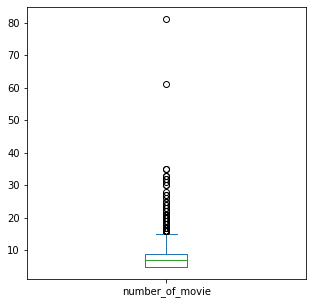

In [ ]:
dfc['number_of_movie'].plot.box(figsize=(5,5))

<AxesSubplot:>

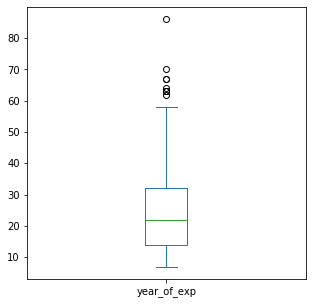

In [ ]:
dfc['year_of_exp'].plot.box(figsize=(5,5))

##Data Analysis

Pada bagian year_of_exp, terdapat beberapa data outlier, yang akan diabaikan. Hal ini memungkinkan karena batas yang ditetapkan adalah 100 tahun (1 abad), sehingga ada perhitungan total pengalaman seorang Aktor dan Aktris sudah 100 tahun pada tahun 2009

Hal menarik pada number_of_movie. Terdapat Aktor dan Aktris yang membintangi hingga 80 film dalam kurun waktu tersebut. Awalnya data-data outlier pada number_of_movie akan kita keluarkan, namun dengan asumsi bahwa semakin banyak judul film yang dibintangi merupakan apresiasi terhadap kemampuan seorang aktor dan aktris, maka data tersebut tidak akan kita keluarkan


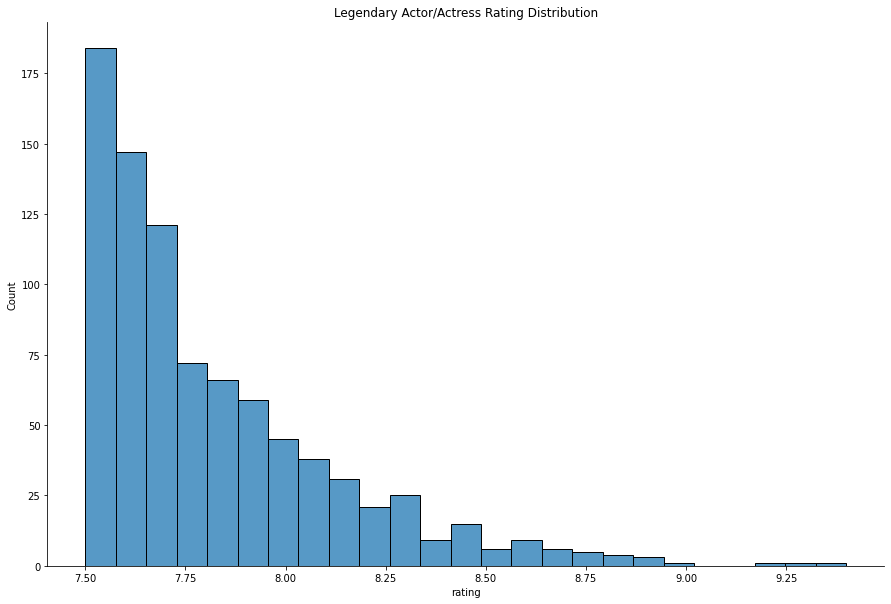

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Legendary Actor/Actress Rating Distribution')
sns.histplot(dfc['rating'])
sns.despine()
plt.show()

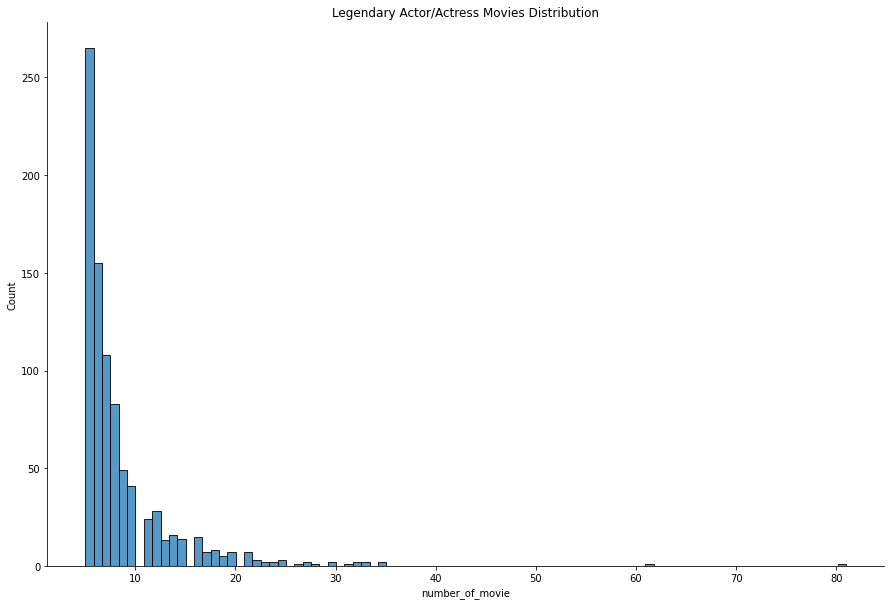

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Legendary Actor/Actress Movies Distribution')
sns.histplot(dfc['number_of_movie'])
sns.despine()
plt.show()

In [ ]:
dfc[['name','number_of_movie']].sort_values(by='number_of_movie', ascending=False)

,name,number_of_movie
427,Kemal Sunal,81
131,Chishu Ryu,61
77,Asit (I) Sen,35
411,Kamal Hassan,35
696,Sanjeev (I) Kumar,33
...,...,...
307,Ilja Racek,5
308,Ilona Kusmierska,5
600,Ognian Zheliazkov,5
599,Octavian Cotescu,5


Terdapat 2 Aktor/Aktris yang membintangi film dengan jumlah yang tidak wajar dibandingkan dengan Aktor/Aktris lainnya. Untuk itu, kita lakukan pengecekan terkait kualitas kedua Aktor/Aktris tersebut untuk memutuskan apakah mereka akan dimasukkan ke dalam nominasi atau tidak. 

In [ ]:
query='''
    select concat(a.first_name," ",a.last_name) as name, avg(m.rank) as rating
    from actors a
    left join roles r on a.id = r.actor_id
    left join movies m on r.movie_id = m.id
    where a.first_name = 'Kemal'
    and a.last_name = 'Sunal'
    and m.year between 1909 and 2009
    and rank is not null
    and year is not null
    group by concat(a.first_name," ",a.last_name)
    
'''

df_check_ks1 = que(query, engine)
df_check_ks1

,name,rating
0,Kemal Sunal,7.538272


In [ ]:
query='''
    select *
    from actors a
    left join roles r on a.id = r.actor_id
    left join movies m on r.movie_id = m.id
    where a.first_name = 'Kemal'
    and a.last_name = 'Sunal'
    and m.year between 1909 and 2009
    and rank is not null
    and year is not null
'''

df_check_ks2 = que(query, engine)
df_check_ks2

,id,first_name,last_name,gender,actor_id,movie_id,role,id,name,year,rank
0,460322,Kemal,Sunal,M,460322,5274,,5274,Abuk Sabuk Bir Film,1990,8.4
1,460322,Kemal,Sunal,M,460322,23200,,23200,Atla Gel Saban,1984,8.9
2,460322,Kemal,Sunal,M,460322,24806,Apti,24806,Avanak Apti,1978,4.2
3,460322,Kemal,Sunal,M,460322,33256,,33256,Bekiler Kral,1979,6.4
4,460322,Kemal,Sunal,M,460322,39103,,39103,Bikin,1988,7.7
...,...,...,...,...,...,...,...,...,...,...,...
76,460322,Kemal,Sunal,M,460322,376618,Ibrahim Zübükzade,376618,Zbk,1980,8.2
77,460322,Kemal,Sunal,M,460322,377514,,377514,arikli milyoner,1983,5.8
78,460322,Kemal,Sunal,M,460322,377570,Apti,377570,pler krali,1977,8.1
79,460322,Kemal,Sunal,M,460322,378178,,378178,gretmen,1988,6.2


In [ ]:
query='''
    select concat(a.first_name," ",a.last_name) as name, avg(m.rank) as rating
    from actors a
    left join roles r on a.id = r.actor_id
    left join movies m on r.movie_id = m.id
    where a.first_name = 'Chishu'
    and a.last_name = 'Ryu'
    and m.year between 1909 and 2009
      and rank is not null
    and year is not null
    group by concat(a.first_name," ",a.last_name)
'''

df_check_ks1 = que(query, engine)
df_check_ks1

,name,rating
0,Chishu Ryu,7.501639


In [ ]:
query='''
    select *
    from actors a
    left join roles r on a.id = r.actor_id
    left join movies m on r.movie_id = m.id
    where a.first_name = 'Chishu'
    and a.last_name = 'Ryu'
    and m.year between 1909 and 2009
    and rank is not null
    and year is not null
'''

df_check_ks2 = que(query, engine)
df_check_ks2

,id,first_name,last_name,gender,actor_id,movie_id,role,id,name,year,rank
0,413432,Chishu,Ryu,M,413432,9276,Mr. Yasumoto,9276,Akahige,1965,7.8
1,413432,Chishu,Ryu,M,413432,9420,Shukichi Miwa,9420,Akibiyori,1960,7.5
2,413432,Chishu,Ryu,M,413432,28129,Koichi,28129,Bakush,1951,8.6
3,413432,Chishu,Ryu,M,413432,29424,Shukichi Somiya,29424,Banshun,1949,8.7
4,413432,Chishu,Ryu,M,413432,38761,Mr. Mori,38761,Bis ans Ende der Welt,1991,6.5
...,...,...,...,...,...,...,...,...,...,...,...
56,413432,Chishu,Ryu,M,413432,344285,Theatre Owner,344285,Ukigusa,1959,8.2
57,413432,Chishu,Ryu,M,413432,358406,,358406,Wakaki hi,1929,7.1
58,413432,Chishu,Ryu,M,413432,359611,Public Prosecutor Nonaka,359611,Warui yatsu hodo yoku nemuru,1960,7.6
59,413432,Chishu,Ryu,M,413432,373218,Old Man,373218,Yume,1990,7.5


Aktor Kemal Sunal bermain dalam 82 film yang memiliki data tahun dan rating dan rata-rata nya adalah 7.53. Berdasarkan nilai ini, maka Kemal Sunal tetap dimasukkan ke dalam nominasi

Hal yang sama kita terapkan pada Chishu Ryu, di mana beliau membintangi 61 film yang memiliki data tahun dan rating dengan nilai rata-rata 7.50, sehingga Chishu Ryu juga berhak masuk ke dalam nominasi

Dalam menentukan Aktor/Aktris terbaik, karena ada beberapa faktor yang menentukan, maka kita akan menerapkan metode berikut :

1. Pengurutan berdasarkan jumlah film, di mana semakin banyak film yang dibintangi, skor nya akan semakin tinggi
2. Pengurutan berdasarkan rating film, di mana semakin tinggi ratingnya, maka skor akan semakin tinggi.
3. Penjumlahan dari kedua skor. Jika ada yang memiliki skor yang sama dalam menentukan pemenang, maka akan dilakukan analisa lebih lanjut untuk menentukan pemenang.

Kita akan ambil ulang data yang sebelumnya sudah kita filter dengan persyaratan di awal

In [ ]:
query = '''
select
  name,
  number_of_movie,
  rating,
  start_year,
  end_year,
  end_year - start_year as year_of_exp
from (
  select
    concat(a.first_name, ' ', a.last_name) as name,
    count(distinct m.id) AS number_of_movie,
    avg(m.rank) as rating,
    min(m.year) as start_year,
    max(m.year) as end_year
  from actors a
    left join roles r on a.id = r.actor_id
    left join movies m on r.movie_id = m.id
  where
    m.year between 1909 and 2008
    and m.rank IS NOT NULL
    and m.year IS NOT NULL
  group by concat(a.first_name, ' ', a.last_name)
  having rating >= 7.5 and number_of_movie >= 5 and max(m.year)-min(m.year) >= 7) subquery
'''

dfc = que(query,engine)
dfc

,name,number_of_movie,rating,start_year,end_year,year_of_exp
0,A.K. Kamalam,18,7.983333,1971,1999,28
1,Abhi Bhattacharya,13,7.853846,1964,1976,12
2,Abhimanya Sharma,6,7.700000,1965,1980,15
3,Abrahão Farc,6,7.650000,1968,1993,25
4,Ada Dondini,7,7.657143,1941,1954,13
...,...,...,...,...,...,...
865,Zita Perczel,5,7.520000,1934,1997,63
866,Zoltán Makláry,12,7.816667,1931,1966,35
867,Zoltán Vadász,6,7.750000,1976,1983,7
868,Zoltán Várkonyi,7,7.785714,1934,1966,32


Setelah mendapatkan data, maka langkah selanjutnya adalah memberikan skor kepada setiap 'name' dengan perhitungan yang menempati rank 1 akan mendapatkan nilai tertinggi, dan seterusnya.

Setiap Aktor/Aktris yang mendapatkan avg_rating yang sama akan berada pada rank yang sama juga

In [ ]:
df_new = dfc.groupby('name').agg(avg_rating=('rating', 'mean'))
df_new['rank'] = df_new['avg_rating'].rank(method='dense', ascending=False)
result_df = df_new.merge(dfc[['name']], on='name')
result_df = result_df[['rank', 'name', 'avg_rating']]
result_df = result_df.sort_values('rank')

print(result_df)

      rank                name  avg_rating
234    1.0          Geo Barton    9.400000
249    2.0   Gheorghe Cozorici    9.283333
596    3.0    Octavian Cotescu    9.240000
28     4.0  Alexandru Dobrescu    8.980000
11     5.0     Aimee Iacobescu    8.900000
..     ...                 ...         ...
525  623.0     Mieczyslaw Loza    7.500000
360  623.0         Jerzy Cnota    7.500000
48   623.0  Andrei Kostrichkin    7.500000
9    623.0         Aga Muhlach    7.500000
378  623.0   José María Yazpik    7.500000

[870 rows x 3 columns]


Kemudian jika terdapat 2 nilai yang sama, maka akan mendapatkan skor yang sama.

Formula perhitungan skor yang digunakan adalah sebagai berikut:
(ranking maksimum/tertinggi) - ranking peserta + 1.

Kita akan ambil 50 Aktor/Aktris terbaik pada kondisi berikut, dengan skor maksimum yang bisa didapat oleh seorang Aktor/Aktris adalah 50

In [ ]:
max_score = 50
score_list = []

for rank in result_df['rank']:
    score = max_score - rank + 1
    score_list.append(score)

result_df['score'] = score_list
print(result_df.head(50))

     rank                      name  avg_rating  score
234   1.0                Geo Barton    9.400000   50.0
249   2.0         Gheorghe Cozorici    9.283333   49.0
596   3.0          Octavian Cotescu    9.240000   48.0
28    4.0        Alexandru Dobrescu    8.980000   47.0
11    5.0           Aimee Iacobescu    8.900000   46.0
313   6.0               Ioana Bulca    8.900000   45.0
96    7.0               Bipin Gupta    8.880000   44.0
144   8.0               Cory McAbee    8.840000   43.0
643   9.0           Pyotr Kiryutkin    8.840000   42.0
216  10.0        Florin Scarlatescu    8.828572   41.0
590  11.0                Nora Aunor    8.800000   40.0
320  12.0            Irina Petrescu    8.780000   39.0
475  13.0                 M. Babjan    8.766667   38.0
692  14.0        Sebastian Papaiani    8.762500   37.0
681  15.0             S. Shamsuddin    8.760000   36.0
594  16.0              Nyong Ismail    8.720000   35.0
489  17.0               Marga Barbu    8.708333   34.0
631  18.0 

Kemudian kita lakukan perhitungan yang sama dengan menggunakan 'number_of_movie' sebagai variabel yang akan diurutkan.

Adapun cara perhitungan skor sama dengan sebelumnya

In [ ]:
grouped_df2 = dfc.groupby('name').agg(num_of_movie=('number_of_movie', 'first'))
grouped_df2['num_rank'] = grouped_df2['num_of_movie'].rank(method='dense', ascending=False)
result_df2 = grouped_df2.merge(dfc[['name']], on='name')
result_df2 = result_df2[['num_rank', 'name', 'num_of_movie']]
result_df2 = result_df2.sort_values('num_rank')
print(result_df2)

     num_rank               name  num_of_movie
423       1.0        Kemal Sunal            81
129       2.0         Chishu Ryu            61
407       3.0       Kamal Hassan            35
75        3.0       Asit (I) Sen            35
690       4.0  Sanjeev (I) Kumar            33
..        ...                ...           ...
412      31.0        Karen Prell             5
648      31.0        Péter Benkö             5
647      31.0      Pálma Gyimesi             5
413      31.0    Karla Chadimová             5
869      31.0         Éric Bossé             5

[870 rows x 3 columns]


In [ ]:
max_score = 50
score_list2 = []

for rank2 in result_df2['num_rank']:
    score_num = max_score - rank2 + 1
    score_list2.append(score_num)

result_df2['score_num'] = score_list2
print(result_df2.head(50))

     num_rank                  name  num_of_movie  score_num
423       1.0           Kemal Sunal            81       50.0
129       2.0            Chishu Ryu            61       49.0
407       3.0          Kamal Hassan            35       48.0
75        3.0          Asit (I) Sen            35       48.0
690       4.0     Sanjeev (I) Kumar            33       47.0
74        4.0       Ashok (I) Kumar            33       47.0
837       5.0        Yevgeni Leonov            32       46.0
315       5.0            Ion Besoiu            32       46.0
250       6.0       Gheorghe Dinica            31       45.0
707       7.0       Sharmila Tagore            30       44.0
697       7.0             Sener Sen            30       44.0
148       8.0      Daisuke (I) Katô            28       43.0
584       9.0          Nikos Fermas            27       42.0
672       9.0           Rolan Bykov            27       42.0
164      10.0           Dezsõ Garas            26       41.0
694      11.0       Seij

In [ ]:
final_df = result_df.merge(result_df2, on='name')
final_df['rating_score'] = final_df['score']
final_df['num_mov_score'] = final_df['score_num']
final_df['final_score'] = final_df['rating_score'] + final_df['score_num']
final_df.sort_values(by='final_score', ascending=False)
final_df['final_rank'] = final_df['final_score'].rank(method='dense', ascending=False)
final_df = final_df[['final_rank', 'name', 'rating_score', 'num_mov_score', 'final_score']]
final_df = final_df.sort_values(by='final_rank')
print(final_df.head(10))


    final_rank                name  rating_score  num_mov_score  final_score
0          1.0          Geo Barton          50.0           20.0         70.0
1          1.0   Gheorghe Cozorici          49.0           21.0         70.0
2          2.0    Octavian Cotescu          48.0           20.0         68.0
4          2.0     Aimee Iacobescu          46.0           22.0         68.0
13         2.0  Sebastian Papaiani          37.0           31.0         68.0
3          3.0  Alexandru Dobrescu          47.0           20.0         67.0
5          3.0         Ioana Bulca          45.0           22.0         67.0
10         4.0          Nora Aunor          40.0           24.0         64.0
6          4.0         Bipin Gupta          44.0           20.0         64.0
9          5.0  Florin Scarlatescu          41.0           22.0         63.0


Dari hasil kalkulasi, ternyata ada 2 orang yang memiliki total nilai sama, yaitu 70. Untuk menentukan pemenangnya, maka akan dilakukan analisa dengan menggunakan faktor lain, yaitu jumlah genre yang dimainkan oleh setiap aktor, dimana jumlah genre terbanyak akan menjadi pemenangnya. Hal ini juga akan diterapkan untuk posisi 3.


In [ ]:
query = '''
select concat(a.first_name,' ',a.last_name) as name, count(distinct mg.genre) as total_mov_genre
from actors a
join roles r on a.id = r.actor_id
join movies m on r.movie_id = m.id
join movies_genres mg on m.id = mg.movie_id
where concat(a.first_name,' ',a.last_name) = 'Geo Barton'
or concat(a.first_name,' ',a.last_name) = 'Gheorghe Cozorici'
or concat(a.first_name,' ',a.last_name) = 'Octavian Cotescu'
or concat(a.first_name,' ',a.last_name) = 'Aimee Iacobescu'
or concat(a.first_name,' ',a.last_name) = 'Sebastian Papaiani'
group by concat(a.first_name,' ',a.last_name)
'''

dfca = que(query,engine)
dfca

,name,total_mov_genre
0,Aimee Iacobescu,6
1,Geo Barton,7
2,Gheorghe Cozorici,6
3,Octavian Cotescu,10
4,Sebastian Papaiani,10


Berdasarkan hasil akhir, didapatkan bahwa Geo Barton memainkan 7 genre film, sedangkan Gheorghe Cozorici hanya memainkan 6 genre, sehingga Geo Barton dinobatkan sebagai pemenang Aktor Terbaik Abad Ini dengan total skor 70 dari 2 kondisi penilaian, serta memainkan 7 genre film.

Di tempat ketiga, karena Octavian Cotescu dan Sebastian Papaiani sama-sama memainkan 10 genre film dan memiliki skor akhir yang sama, maka kita lihat berdasarkan skor rating terbesar, dimana terdapat selisih 11 poin, Octavian Cotescu mendapatkan skor 48, sedangkan Sebastian Papaiani hanya mendapatkan nilai 37, oleh sebab itu Octavian Cotescu dinobatkan sebagai juara 3.

##Conclusion / Result


Berdasarkan hasil analisa yang telah dilakukan, maka didapatkan 3 nominator Aktor Terbaik Abad Ini yaitu:



1.   Geo Barton
2.   Gheorghe Cozorici
3.   Octavian Cotescu



#Nomor 3

QarirLabs Entertainment sedang dalam proses membuat TV series dengan episode yang cukup banyak. TV Series tersebut memiliki konsep banyak plot twist pada alur ceritanya dan perubahan perkembangan karakter yang sangat drastis khususnya pada pemeran utama. Menurut sutradara, aktris dengan pengalaman berakting di beragam genre film dengan rating tinggi merupakan kandidat yang paling cocok. Tim casting membutuhkan daftar berisi 5 rekomendasi aktris yang berpotensi menjadi pemeran utama yang baik pada TV Series tersebut.

Pada langkah awal kita lakukan filter, dimana aktris yang direkomendasikan juga harus berusia cukup muda dengan periode aktif antara tahun 1995 hingga 2008 dengan minimal 5 tahun pengalaman

In [ ]:
query = '''
select concat(a.first_name,' ',a.last_name) as name, count(distinct mg.genre) as total_mov_genre, avg(m.rank) as actress_rating, min(m.year) as start_year, max(m.year) as recent_year
from actors a
join roles r on a.id = r.actor_id
join movies m on r.movie_id = m.id
join movies_genres mg on m.id = mg.movie_id
where a.gender = 'F'
and m.rank is not null
group by concat(a.first_name,' ',a.last_name)
having min(m.year) = 1995
and max(m.year) - min(m.year) >= 5
'''

df3 = que(query,engine)
df3

,name,total_mov_genre,actress_rating,start_year,recent_year
0,Agathe De La Boulaye,8,5.093333,1995,2004
1,Agnès Obadia,4,5.770000,1995,2004
2,Agnieszka Czekanska,3,5.600000,1995,2000
3,Agrippina Steklova,2,7.700000,1995,2003
4,Ai (II) Maeda,6,7.136364,1995,2003
...,...,...,...,...,...
781,Yvette Mercedes,9,5.781250,1995,2004
782,Yvonne De Bark,2,6.250000,1995,2001
783,Yvonne Zima,8,5.673684,1995,2000
784,Zelda Williams,2,5.650000,1995,2004


In [ ]:
df3.describe()

,total_mov_genre,actress_rating,start_year,recent_year
count,786.000000,786.000000,786.0,786.000000
mean,4.765903,5.814357,1995.0,2002.024173
std,2.418855,0.968998,0.0,1.370546
min,1.000000,1.800000,1995.0,2000.000000
25%,3.000000,5.200000,1995.0,2001.000000
50%,4.000000,5.812500,1995.0,2002.000000
75%,6.000000,6.485119,1995.0,2003.000000
max,15.000000,8.650000,1995.0,2004.000000


## Analisa Berdasarkan Jumlah Genre

<AxesSubplot:>

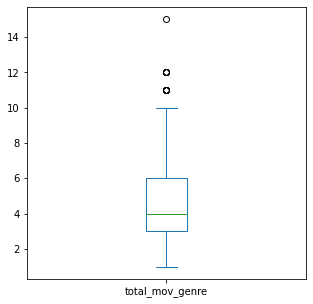

In [ ]:
df3['total_mov_genre'].plot.box(figsize=(5,5))

Berdasarkan data yang didapat, maka data outlier akan kita keluarkan dari analisa, karena asumsi jika genre terlalu banyak, maka seorang Aktris diasumsikan tidak memiliki ciri khas

In [ ]:
Q1 = df3['total_mov_genre'].quantile(0.25)
Q2 = df3['total_mov_genre'].quantile(0.5)
Q3 = df3['total_mov_genre'].quantile(0.75)
IQR = Q3-Q1
limit_atas = Q3 + 1.5*IQR
mov_genre_avg = df3['total_mov_genre'].mean()

print('Q1 :',Q1)
print('Q2 :',Q2)
print('Q3 :',Q3)
print('IQR :',IQR)
print('Limit Atas :',limit_atas)
print('Rata-Rata Genre Seorang Aktris :',mov_genre_avg)

Q1 : 3.0
Q2 : 4.0
Q3 : 6.0
IQR : 3.0
Limit Atas : 10.5
Rata-Rata Genre Seorang Aktris : 4.765903307888041


Setelah mendapatkan perhitungan Limit Atas dan rata-rata genre, maka kita kecilkan kriteria jumlah genre menjadi 
1. Tidak melewati Limit Atas
2. Minimal bermain dalam 5 genre film

Berdasarkan kriteria baru tersebut, maka Aktris yang akan dianggap cocok untuk peran tersebut harus memiliki minimal 5 genre dan maksimal 10 genre film.

In [ ]:
query = '''
select concat(a.first_name,' ',a.last_name) as name, count(distinct mg.genre) as total_mov_genre, avg(m.rank) as actress_rating, min(m.year) as start_year, max(m.year) as recent_year
from actors a
join roles r on a.id = r.actor_id
join movies m on r.movie_id = m.id
join movies_genres mg on m.id = mg.movie_id
where a.gender = 'F'
and m.rank is not null
group by concat(a.first_name,' ',a.last_name)
having min(m.year) = 1995
and max(m.year) - min(m.year) >= 5
and count(distinct mg.genre) between 5 and 10
'''

df3 = que(query,engine)
df3

,name,total_mov_genre,actress_rating,start_year,recent_year
0,Agathe De La Boulaye,8,5.093333,1995,2004
1,Ai (II) Maeda,6,7.136364,1995,2003
2,Alex Meneses,7,4.906667,1995,2002
3,Alexandra Boyd,8,5.722222,1995,2002
4,Aloma Wright,6,5.166667,1995,2004
...,...,...,...,...,...
363,Wanda-Lee Evans,8,5.731579,1995,2000
364,Wendy Raquel Robinson,9,4.776923,1995,2003
365,Yvette Armel,10,5.496667,1995,2004
366,Yvette Mercedes,9,5.781250,1995,2004


## Analisa Berdasarkan Rating

Setelah melakukan analisa dan filter berdasarkan jumlah genre yang dimiliki, selanjutnya kita lakukan analisa melalui rating untuk mendapatkan data artis yang memiliki rating yang baik

In [ ]:
df3['actress_rating'].describe()

count    368.000000
mean       5.721585
std        0.862978
min        3.112500
25%        5.180357
50%        5.733647
75%        6.253889
max        8.280000
Name: actress_rating, dtype: float64

In [ ]:
Q1 = round(df3['actress_rating'].quantile(0.25),2)
Q2 = round(df3['actress_rating'].quantile(0.5),2)
Q3 = round(df3['actress_rating'].quantile(0.75),2)
IQR = round(Q3-Q1,2)
limit_atas = round(Q3 + 1.5*IQR,2)
mov_genre_avg = round(df3['actress_rating'].mean(),2)

print('Q1 :',Q1)
print('Q2 :',Q2)
print('Q3 :',Q3)
print('IQR :',IQR)
print('Limit Atas :',limit_atas)
print('Rata-Rata Rating Seorang Aktris :',mov_genre_avg)

Q1 : 5.18
Q2 : 5.73
Q3 : 6.25
IQR : 1.07
Limit Atas : 7.86
Rata-Rata Rating Seorang Aktris : 5.72


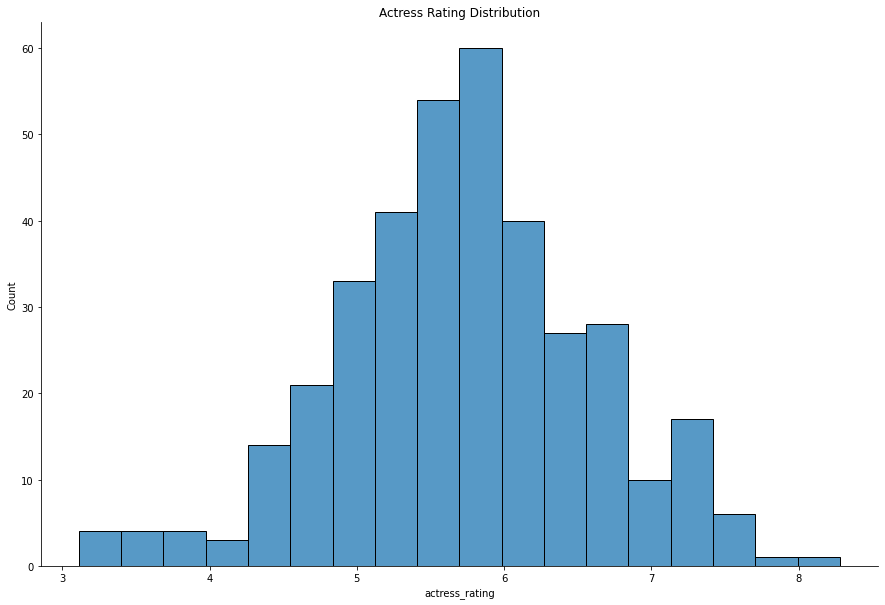

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Actress Rating Distribution')
sns.histplot(df3['actress_rating'])
sns.despine()
plt.show()

Berdasarkan hasil visualisasi data, maka kita akan menggunakan data aktris dengan rating lebih besar dari 8 untuk dipertimbangkan dalam nominasi, sedangkan Aktris yang memiliki rating lebih kecil dari 7.5 akan dikeluarkan dari daftar.

In [ ]:
query = '''
select concat(a.first_name,' ',a.last_name) as name, count(distinct mg.genre) as total_mov_genre, avg(m.rank) as actress_rating, min(m.year) as start_year, max(m.year) as recent_year
from actors a
join roles r on a.id = r.actor_id
join movies m on r.movie_id = m.id
join movies_genres mg on m.id = mg.movie_id
where a.gender = 'F'
and m.rank is not null
group by concat(a.first_name,' ',a.last_name)
having min(m.year) = 1995
and max(m.year) - min(m.year) >= 5
and count(distinct mg.genre) between 5 and 10
and avg(m.rank) >= 7.5
order by avg(m.rank) desc
'''

df3 = que(query,engine)
df3

,name,total_mov_genre,actress_rating,start_year,recent_year
0,Luana Piovani,5,8.280000,1995,2003
1,Rio Natsuki,6,7.842857,1995,2000
2,Anne Reid,5,7.657143,1995,2003
3,Sophie Schütt,5,7.520000,1995,2000
4,Maaya Sakamoto,8,7.506250,1995,2000


##Conclusion

Kita lakukan scoring berdasarkan urutan rating

In [ ]:
df3rating = df3.sort_values(by='actress_rating', ascending=False)
df3rating['rank'] = df3['actress_rating'].rank(method='min', ascending=False)
max_score = 5
score_list = []

for rank in df3rating['rank']:
    score = max_score - rank + 1
    score_list.append(score)

df3rating['score'] = score_list
df3rating = df3rating.sort_index()

print(df3rating)

             name  total_mov_genre  actress_rating  start_year  recent_year  \
0   Luana Piovani                5        8.280000        1995         2003   
1     Rio Natsuki                6        7.842857        1995         2000   
2       Anne Reid                5        7.657143        1995         2003   
3   Sophie Schütt                5        7.520000        1995         2000   
4  Maaya Sakamoto                8        7.506250        1995         2000   

   rank  score  
0   1.0    5.0  
1   2.0    4.0  
2   3.0    3.0  
3   4.0    2.0  
4   5.0    1.0  


Kemudian kita lakukan scoring berdasarkan urutan jumlah genre

In [ ]:
df3genre = df3.sort_values(by='total_mov_genre', ascending=False)
df3genre['rank'] = df3['total_mov_genre'].rank(method='min', ascending=False)
df3genre = df3genre.sort_values(by='rank',ascending=True)
df3genre = df3genre.reset_index(drop=True)
max_score = 5
score_list = []

for rank in df3genre['rank']:
    score = max_score - rank + 1
    score_list.append(score)

df3genre['score2'] = score_list


print(df3genre)

             name  total_mov_genre  actress_rating  start_year  recent_year  \
0  Maaya Sakamoto                8        7.506250        1995         2000   
1     Rio Natsuki                6        7.842857        1995         2000   
2   Luana Piovani                5        8.280000        1995         2003   
3       Anne Reid                5        7.657143        1995         2003   
4   Sophie Schütt                5        7.520000        1995         2000   

   rank  score2  
0   1.0     5.0  
1   2.0     4.0  
2   3.0     3.0  
3   3.0     3.0  
4   3.0     3.0  


Setelah mendapatkan hasil, maka kita gabungkan kedua data frame dalam sebuah dataframe baru yaitu df_final_table

In [ ]:
df_final_table = pd.merge(df3rating,df3genre, on='name')
df_final_table['total_score'] = df_final_table['score'] + df_final_table['score2']
df_final_table = df_final_table.sort_values(by='total_score', ascending=False)
df_final_table['rank'] = df_final_table['total_score'].rank(method='min',ascending=False)
df_final_table = df_final_table[['rank','name','score','score2','total_score']]
df_final_table = df_final_table.reset_index(drop=True)
print(df_final_table)

   rank            name  score  score2  total_score
0   1.0   Luana Piovani    5.0     3.0          8.0
1   1.0     Rio Natsuki    4.0     4.0          8.0
2   3.0       Anne Reid    3.0     3.0          6.0
3   3.0  Maaya Sakamoto    1.0     5.0          6.0
4   5.0   Sophie Schütt    2.0     3.0          5.0


Karena terdapat 2 Aktris dengan Total Score sama, yaitu Luana Piovani dan Rio Natsuki, maka kita melihat rating sebagai acuan, dimnana terdapat selisih rating yang cukup jauh.

Luana Piovani mendapatkan rating 8.28 dari 5 genre film yang dibintanginya, sedangkan Rio Natsuki mendapatkan rating 7.84 dari 6 genre film yang dibintanginya.

Oleh karena itu, Luana Piovani dinobatkan sebagai Aktris utama yang akan membintangi seri baru dari QarirLabs Entertainment

##Result

Nominasi Aktris Utama QarirLabs Entertainment :
1. Luana Piovani
2. Rio Natsuki
3. Anne Reid
4. Maaya sakamoto
5. Sophie Schutt

***Pemenang : Luana Piovani***

---

